In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
names = ['Potential vs Li/Li$^+$']
col = ["Frequency (Hz)", "Z'", "-Z''", "Fit Frequency (Hz)", "Fit Z'", "Fit -Z''" ]
palette = 'cividis_r'
def eis(path, run, sample):
    files = [os.path.join(path, i) for i in os.listdir(path)]
    
    fig, ax = plt.subplots(2,3, dpi = 100, figsize = (25, 15))

    ax[1,1].set_ylim(-10, 400) # ax[1,1].set_ylim(-100,10001
    ax[1,1].set_xlim(100,500) # ax[1,1].set_xlim(100,800)

    # ax[1,2].set_ylim(-10,100)
    # ax[1,2].set_xlim(150,300)

    spectra = pd.DataFrame()

    n = 4.4
    for i in files:
        if '\Fit_' in i:
            df = pd.read_csv(i, sep = '\t', skiprows = 2)
            df = df.rename(columns={'FreeVariable' : names[0], 'Resistance 1: value' : 'Electrolyte Resistance ($\Omega$)', 'Resistance 2: value' : 'Charge transfer Resistance ($\Omega$)' })
        else:
            df_spectra = pd.read_csv(i, skiprows=4, sep = '\t', names=col)
            df_spectra[col[2]] = -df_spectra[col[2]]
            df_spectra[col[5]] = -df_spectra[col[5]]
            df_spectra[names[0]] = str(round(n, ndigits=2))
            spectra = pd.concat([spectra, df_spectra], ignore_index=True)
            n -= 0.1
    df['Run'] = run
    spectra['Run'] = run
    df['Sample'] = sample
    spectra['Sample'] = sample
    
    filter = ['3.6', '3.7', '3.8', '4.4']
    spectra_filtered = spectra[~spectra[names[0]].isin(filter)]


    sns.scatterplot(data = df, x = names[0], y = 'Electrolyte Resistance ($\Omega$)', s = 200, ax = ax[0,0])
    sns.scatterplot(data = df[:-2], x = names[0], y = 'Charge transfer Resistance ($\Omega$)', s = 200, ax = ax[0,1])
    sns.scatterplot(data = df, x = names[0], y = 'CPE Q 1: value', s = 200, ax = ax[0,2])

    sns.scatterplot(data = spectra, x = col[1], y = col[2], hue = names[0], ax = ax[1,0], edgecolor = None, palette=palette)
    sns.lineplot(data = spectra, x = col[4], y = col[5], hue = names[0], ax = ax[1,0], legend = False, palette = palette) 

    sns.scatterplot(data = spectra_filtered, x = col[1], y = col[2], hue = names[0], ax = ax[1,1], edgecolor = None, palette=palette)
    sns.lineplot(data = spectra_filtered, x = col[4], y = col[5], hue = names[0], ax = ax[1,1], legend = False, palette = palette) 

    sns.scatterplot(data = spectra[spectra[names[0]] == '4.0'], x = col[1], y = col[2], hue = names[0], ax = ax[1,2], edgecolor = None, palette=palette)
    sns.lineplot(data = spectra[spectra[names[0]] == '4.0'], x = col[4], y = col[5], hue = names[0], ax = ax[1,2], legend = False, palette = palette)
    plt.show()
    
    
    
    return df, spectra

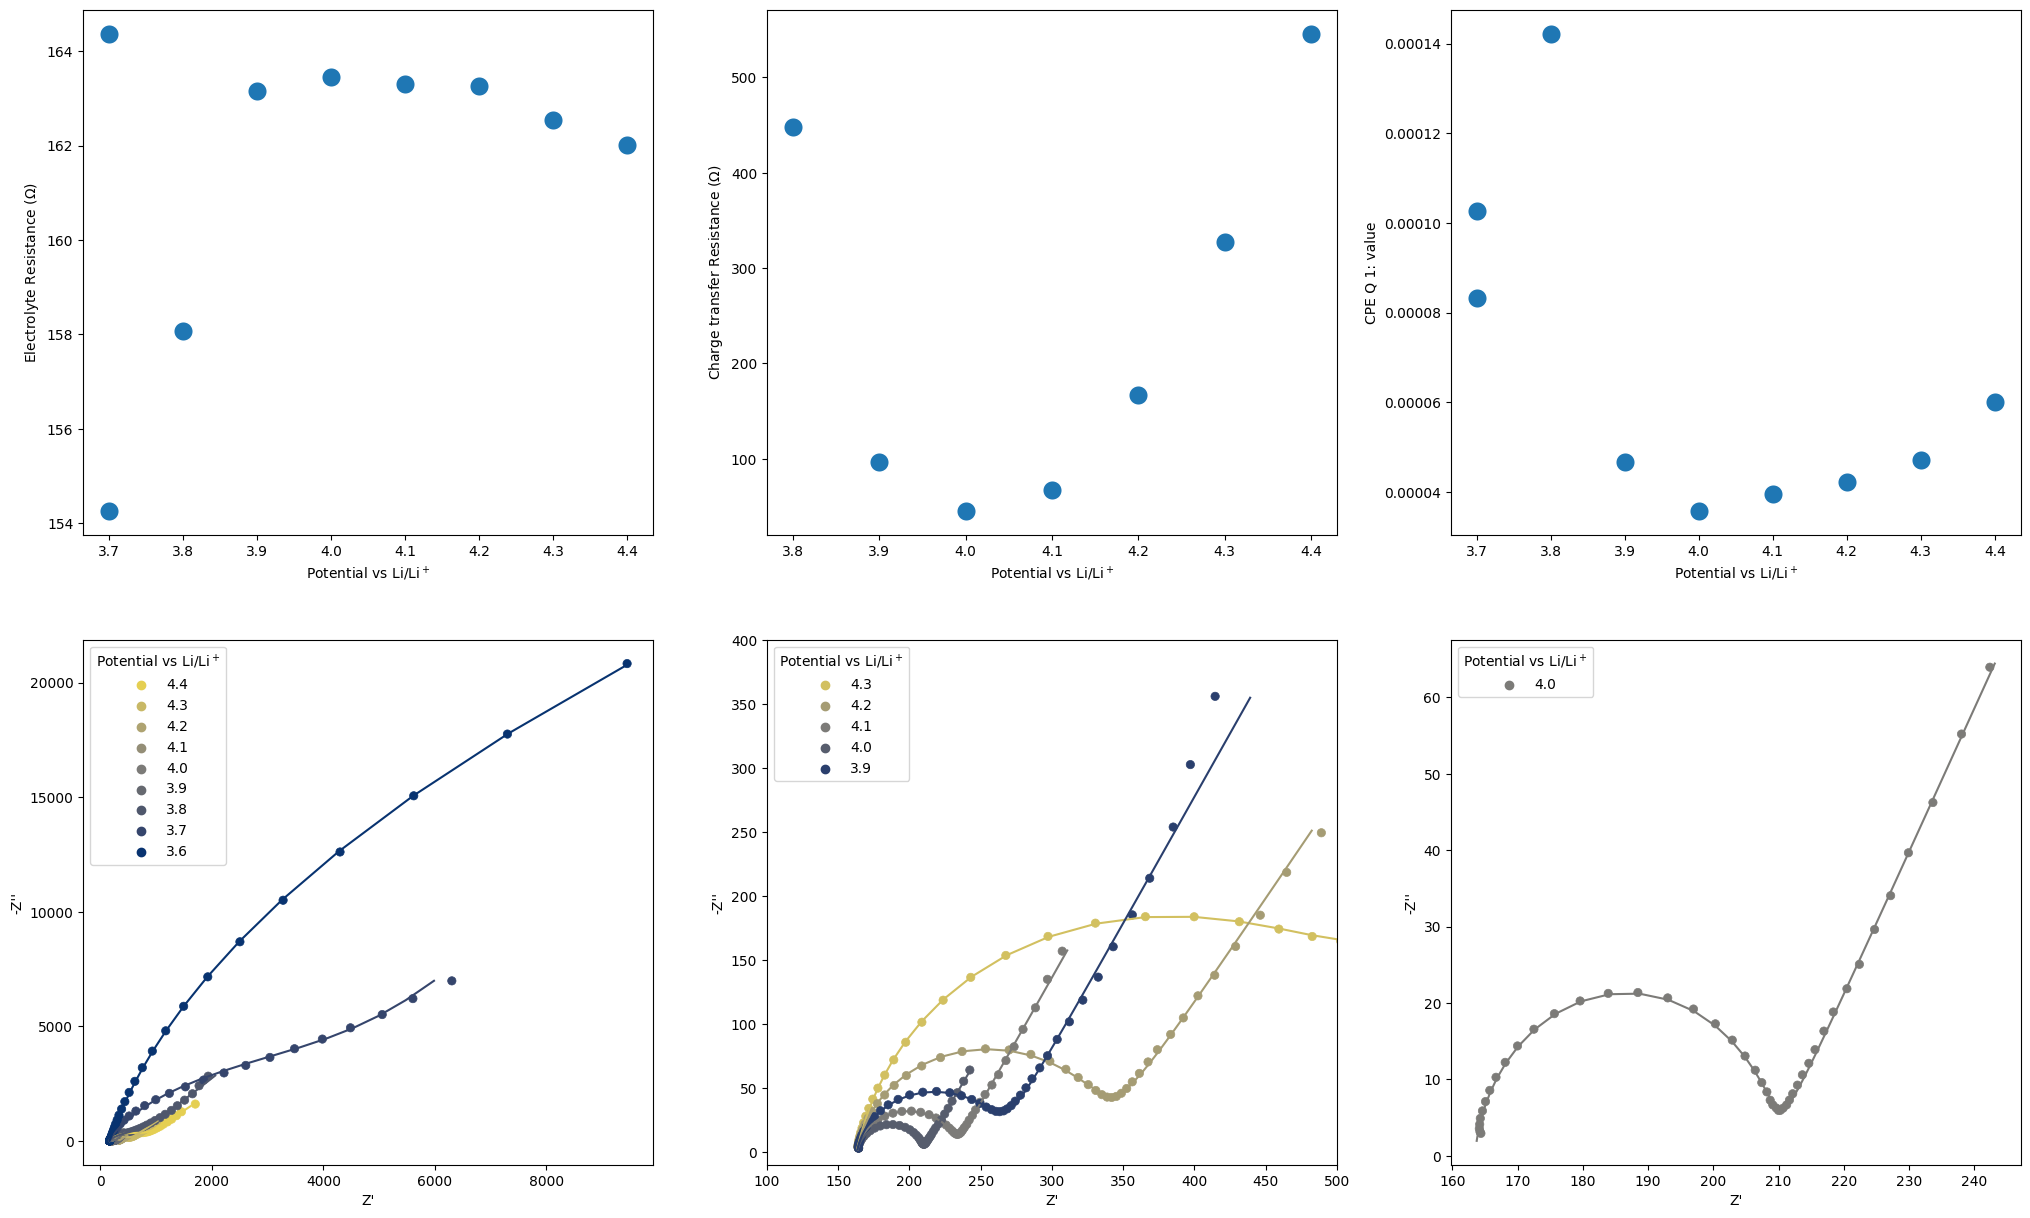

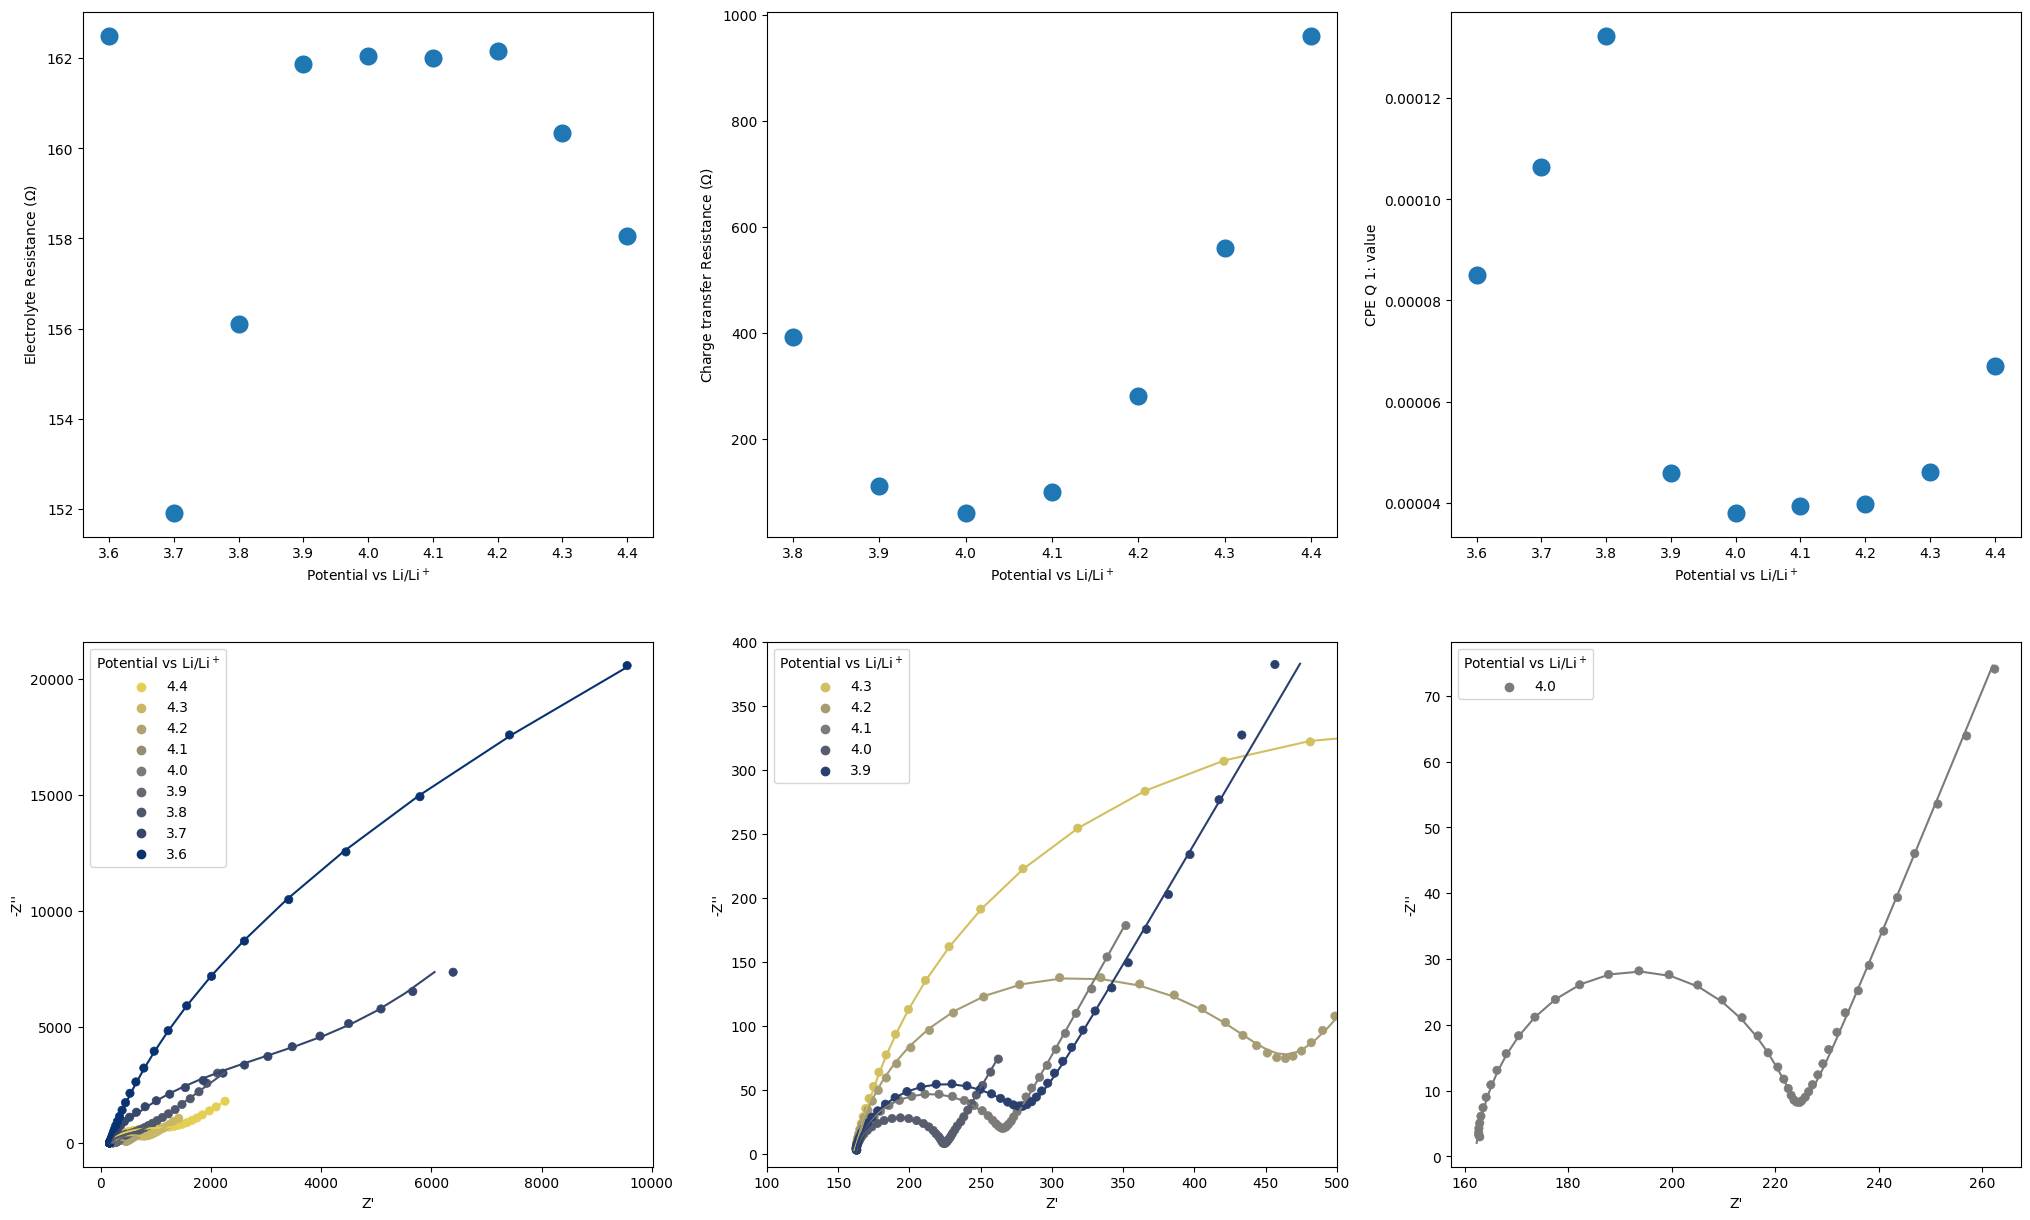

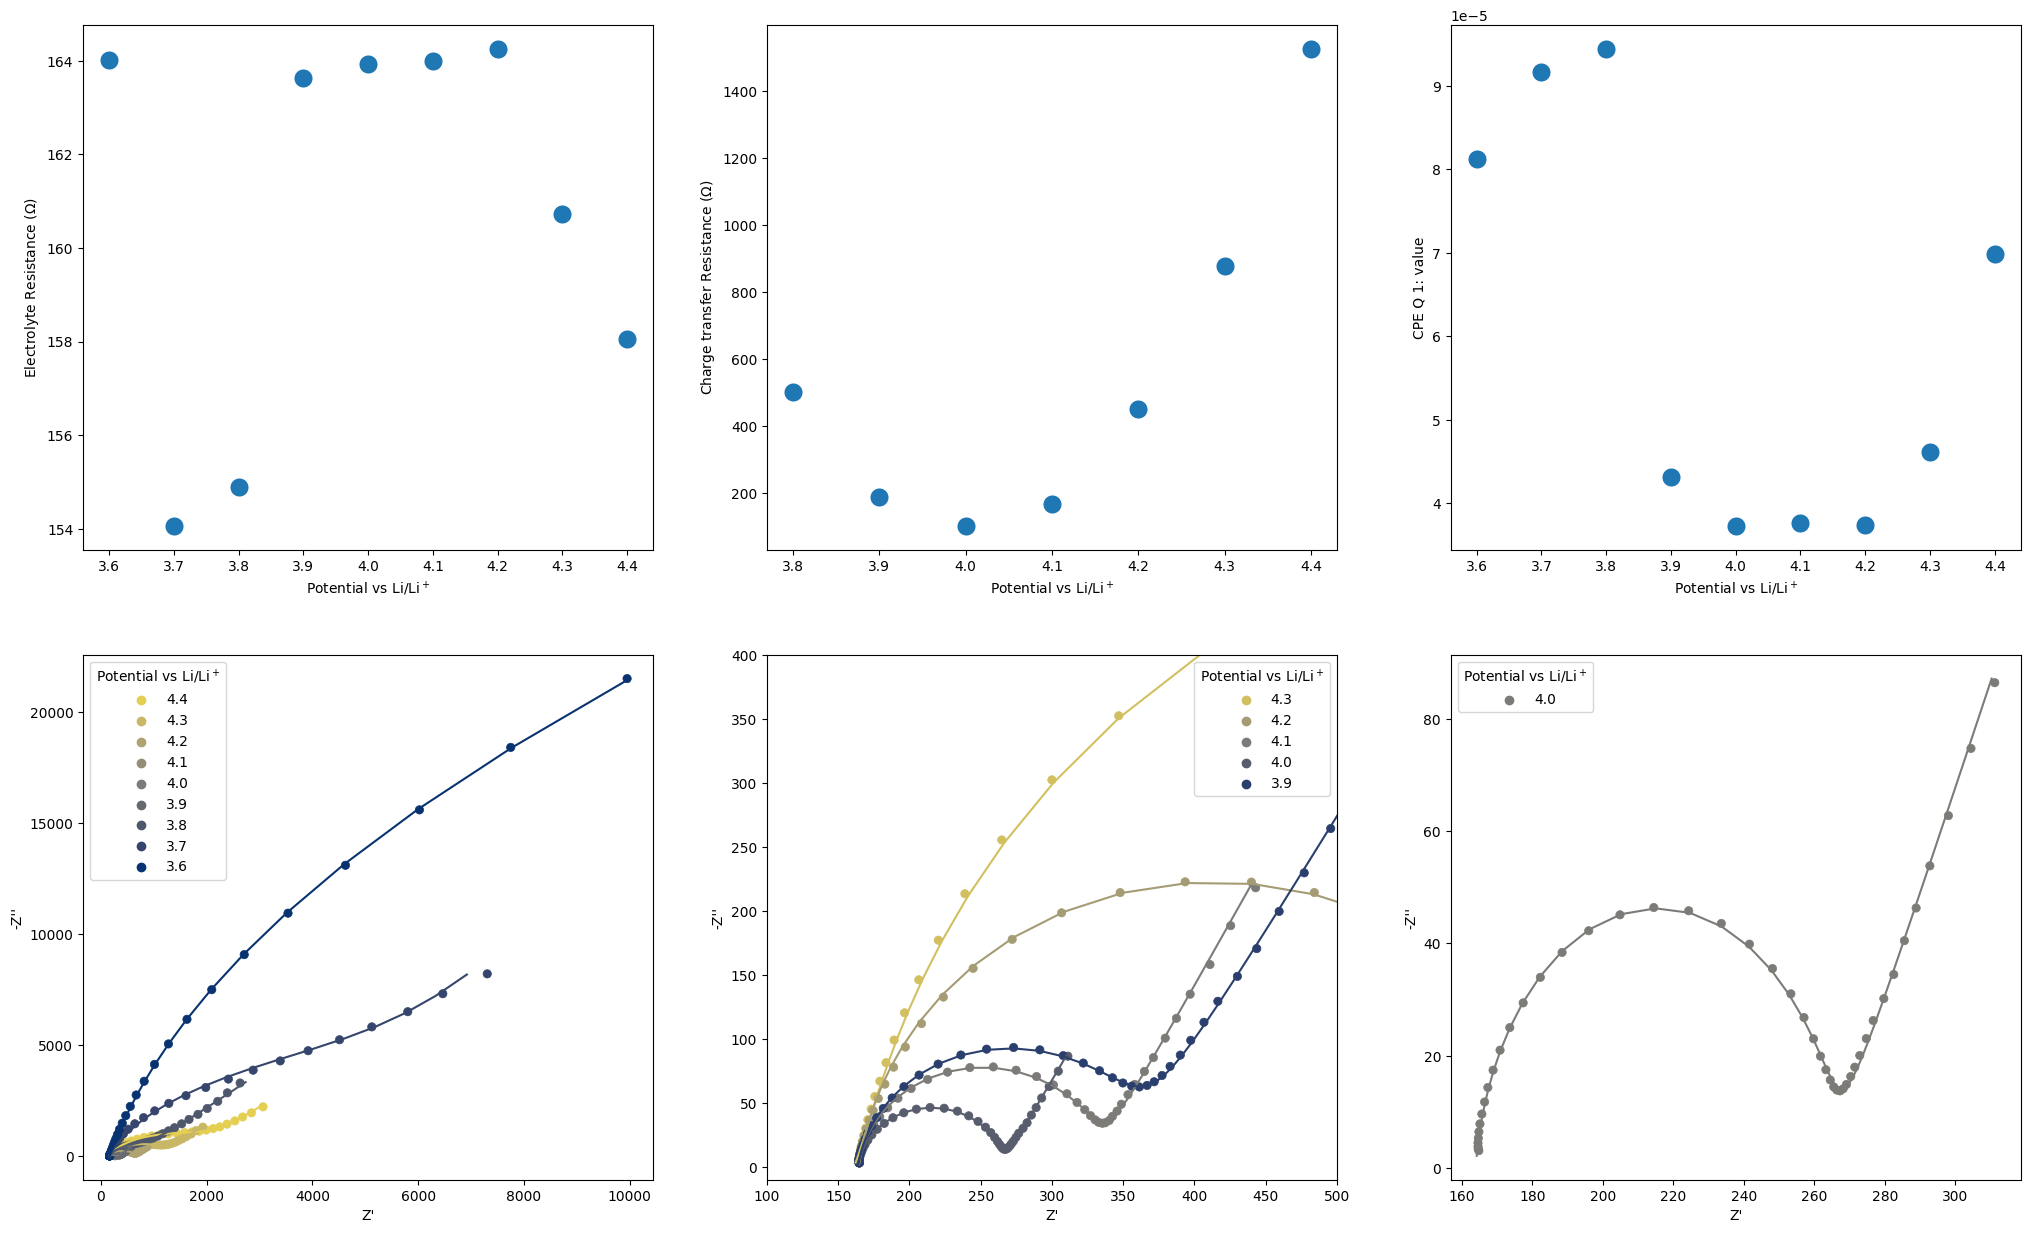

In [4]:
# ============================= ANNNEALED Pt =========================================================================================

sample = 'Annealed Pt 01'

# EIS 1
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\Preannealing\Annealed Pt\01\EIS1\Relaxis_Fit'
values1, spectra1 = eis(path, 'EIS1', sample)

# # EIS 2
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\Preannealing\Annealed Pt\01\EIS2\Relaxis_Fit'
values2, spectra2 = eis(path, 'EIS2', sample)

# EIS3
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\Preannealing\Annealed Pt\01\EIS3\Relaxis_Fit'
values3, spectra3 = eis(path, 'EIS3', sample)

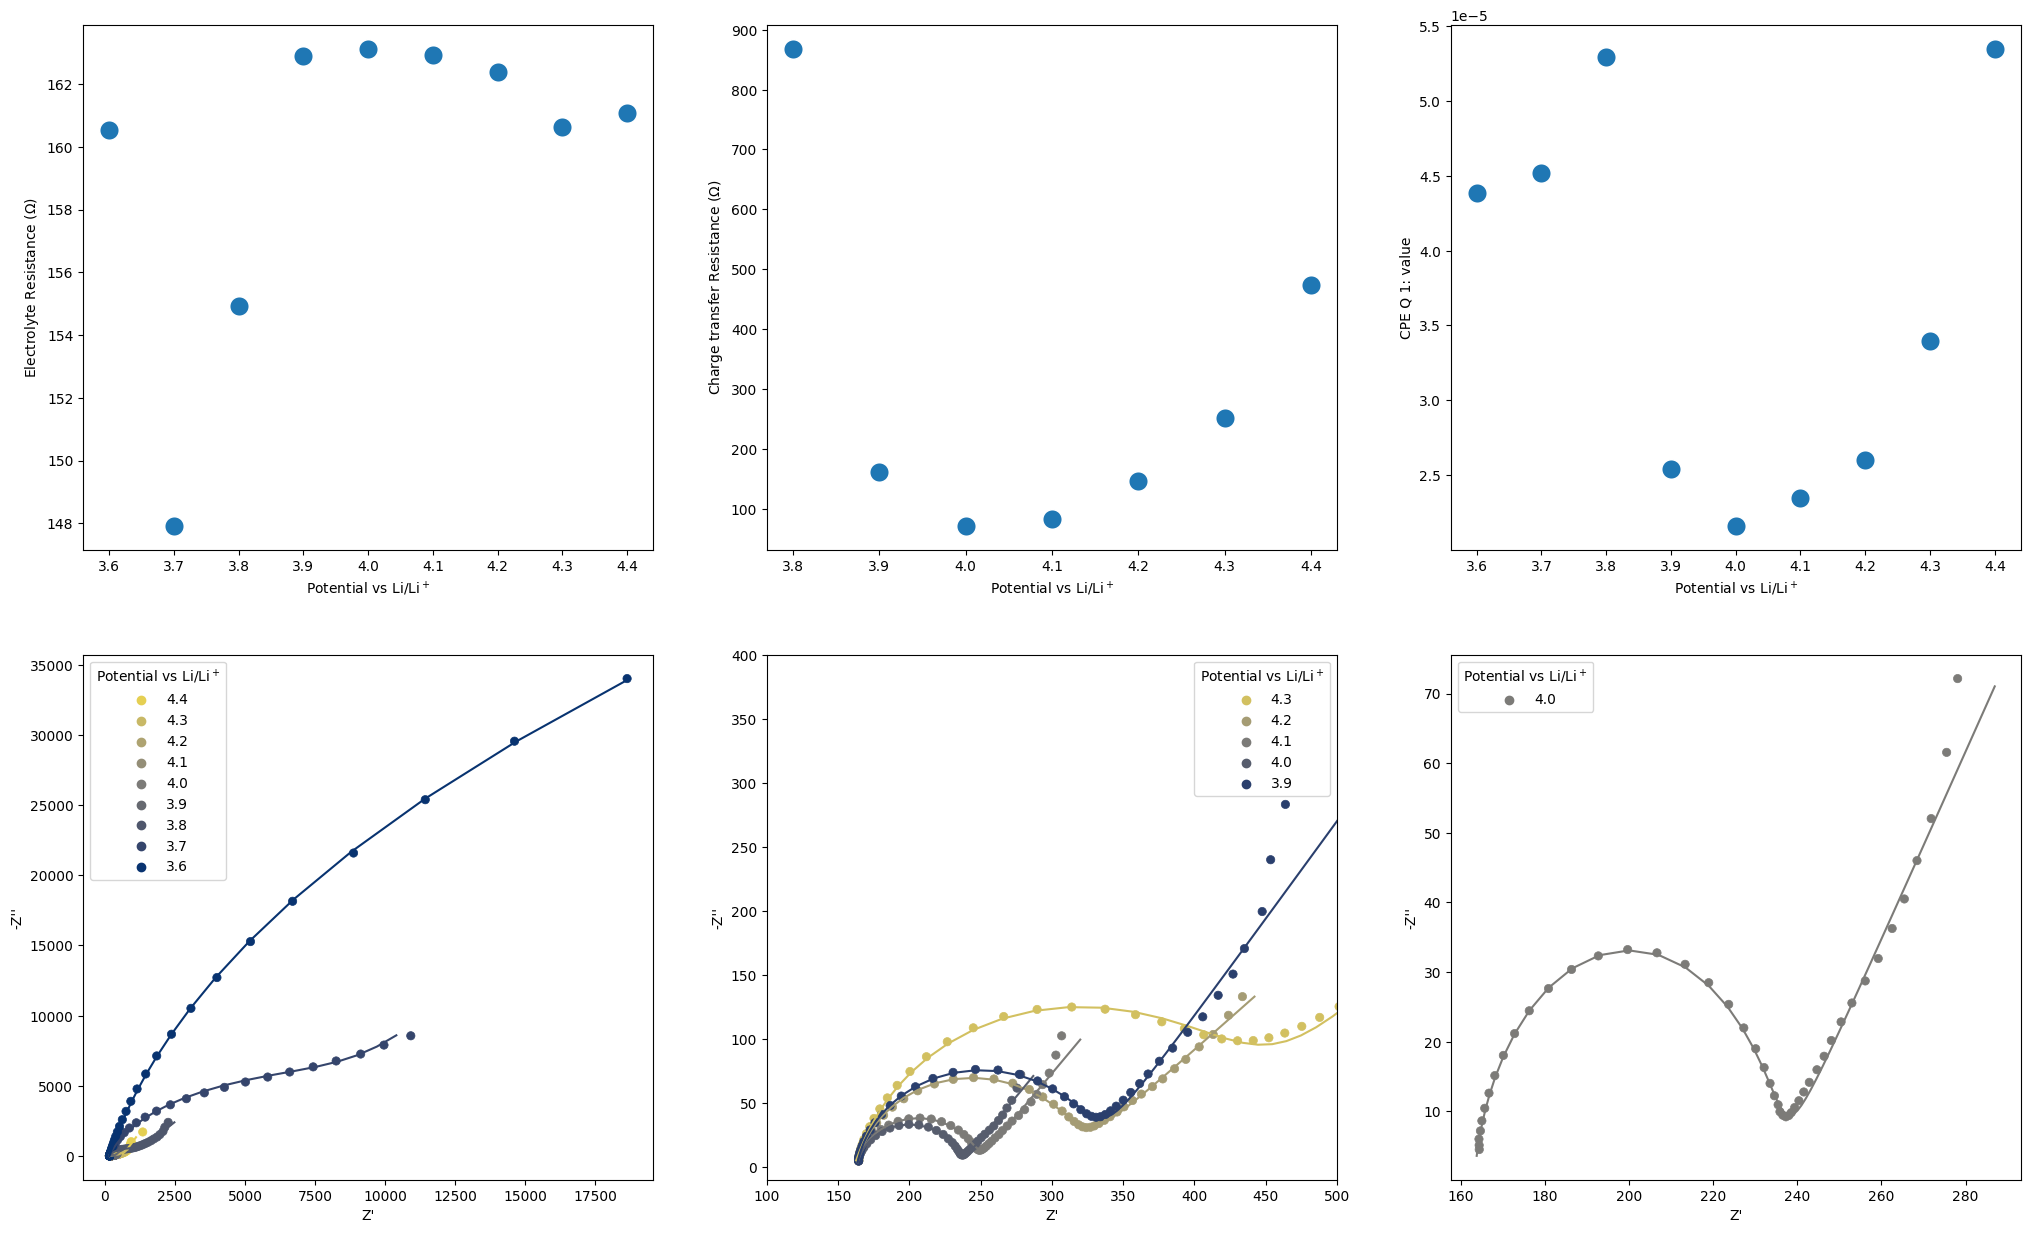

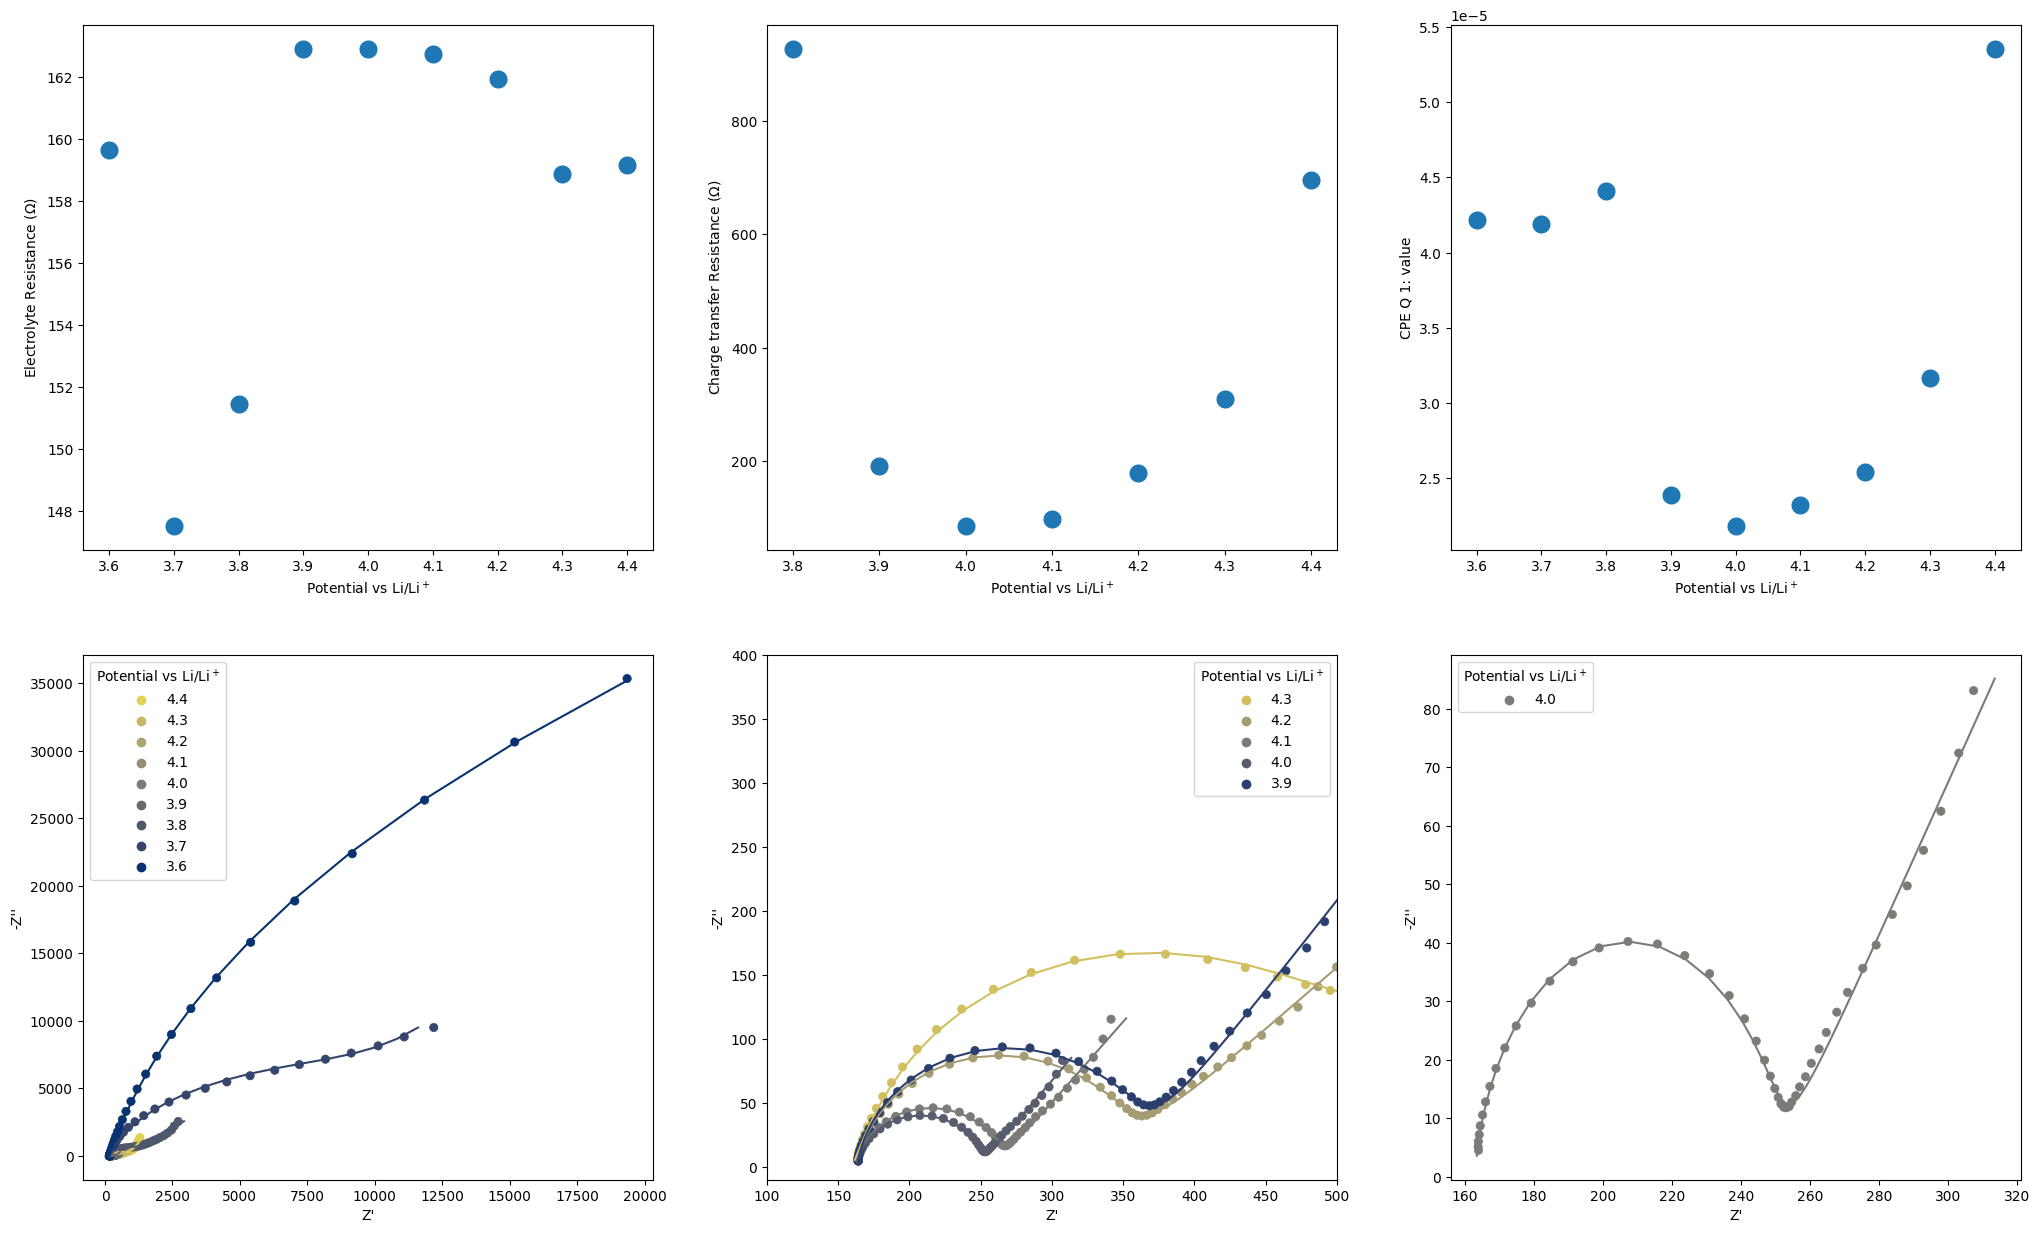

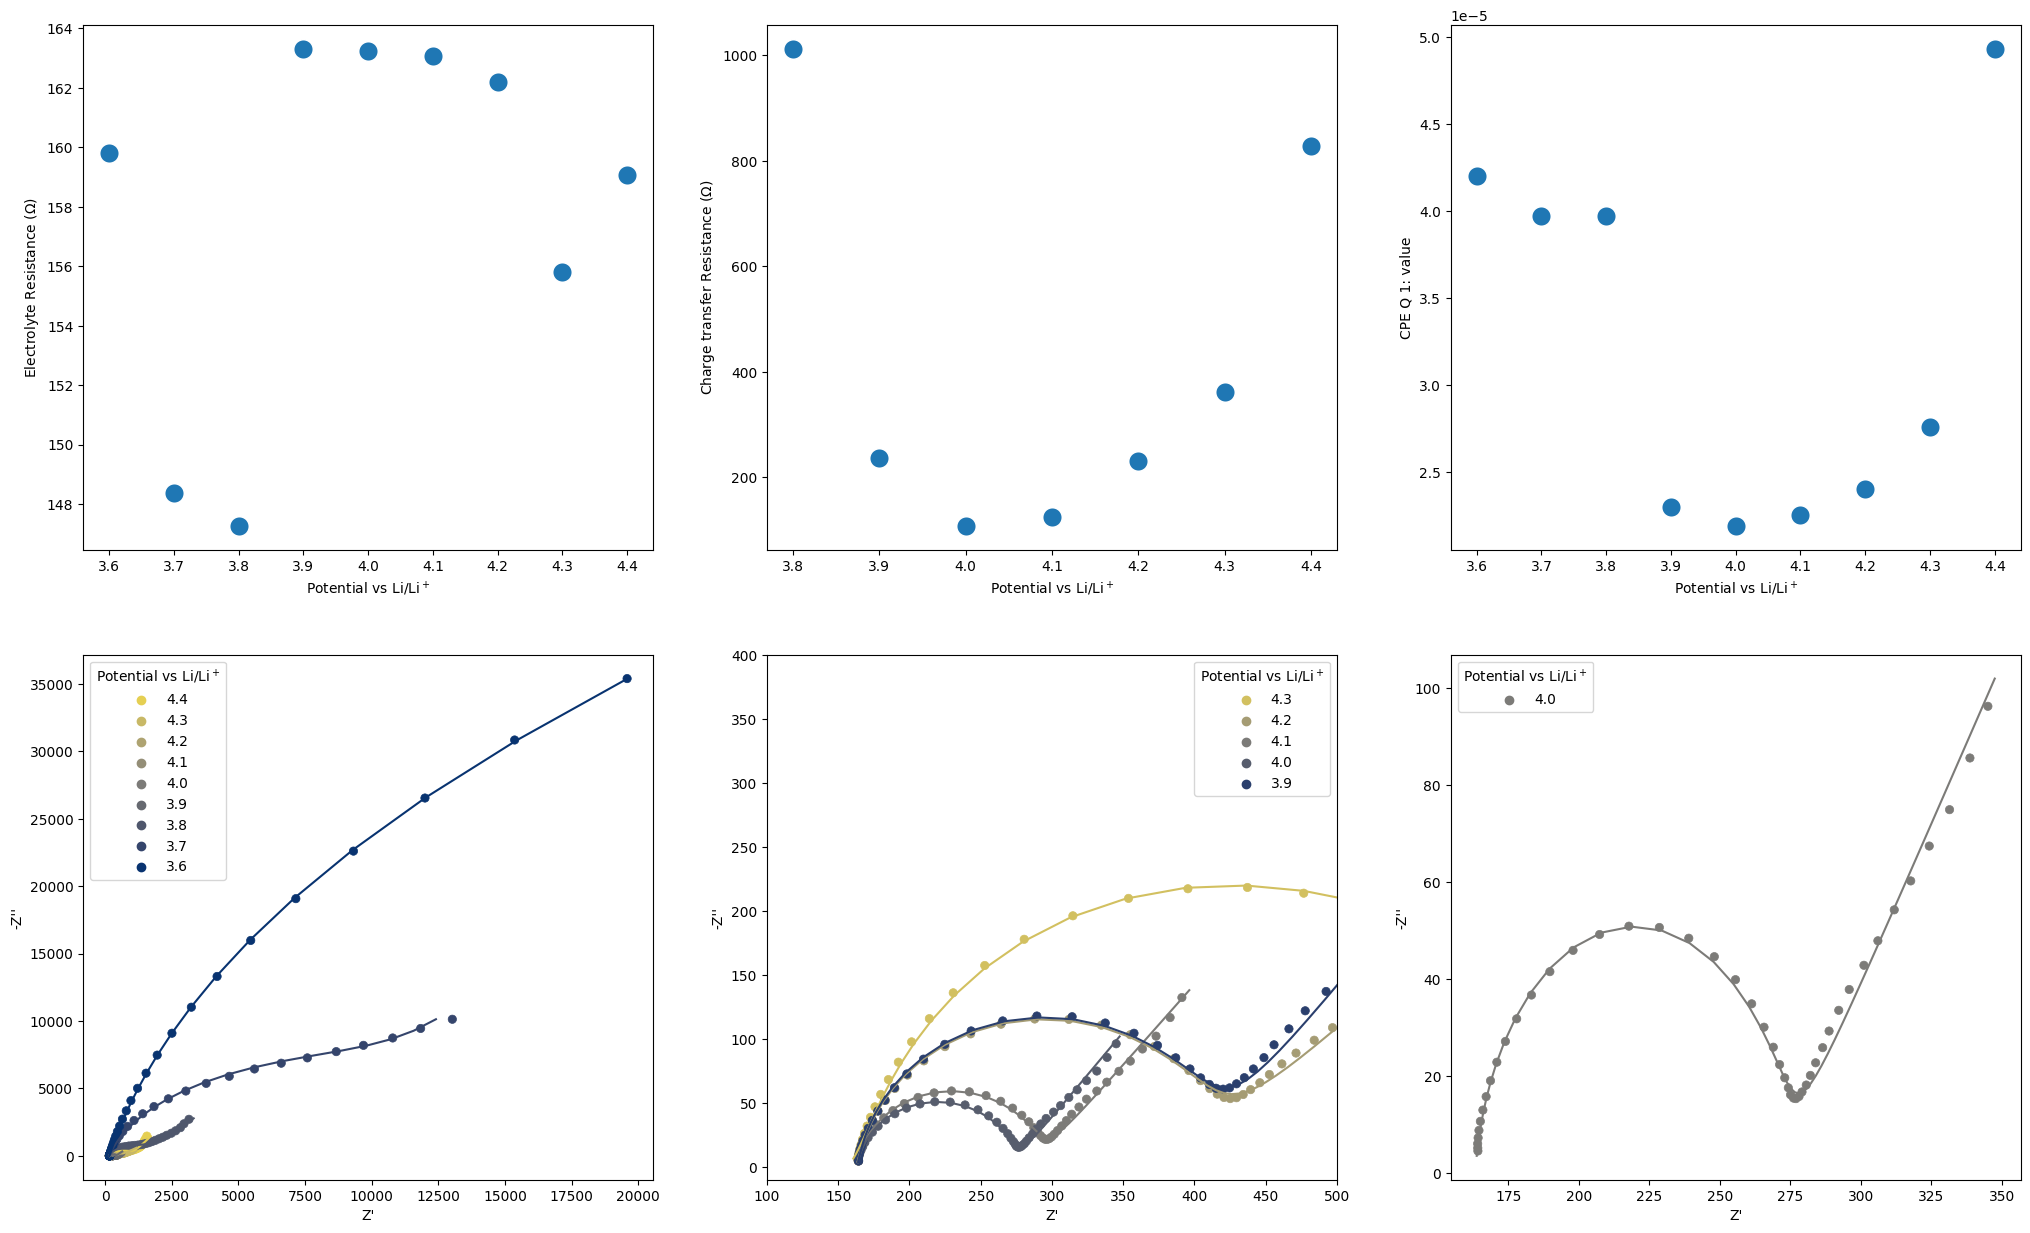

In [5]:
# ============================= NON ANNNEALED Pt =========================================================================================

sample = 'Non-Annealed Pt 02'
# EIS 1
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\Preannealing\Annealed Pt\02\EIS1\Relaxis_Fit'
values_na1, spectra_na1 = eis(path, 'EIS1', sample)

# EIS 2
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\Preannealing\Annealed Pt\02\EIS2\Relaxis_Fit'
values_na2, spectra_na2 = eis(path, 'EIS2', sample)

# EIS 3
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\Preannealing\Annealed Pt\02\EIS3\Relaxis_Fit'
values_na3, spectra_na3 = eis(path, 'EIS3', sample)


(0.0, 300.0)

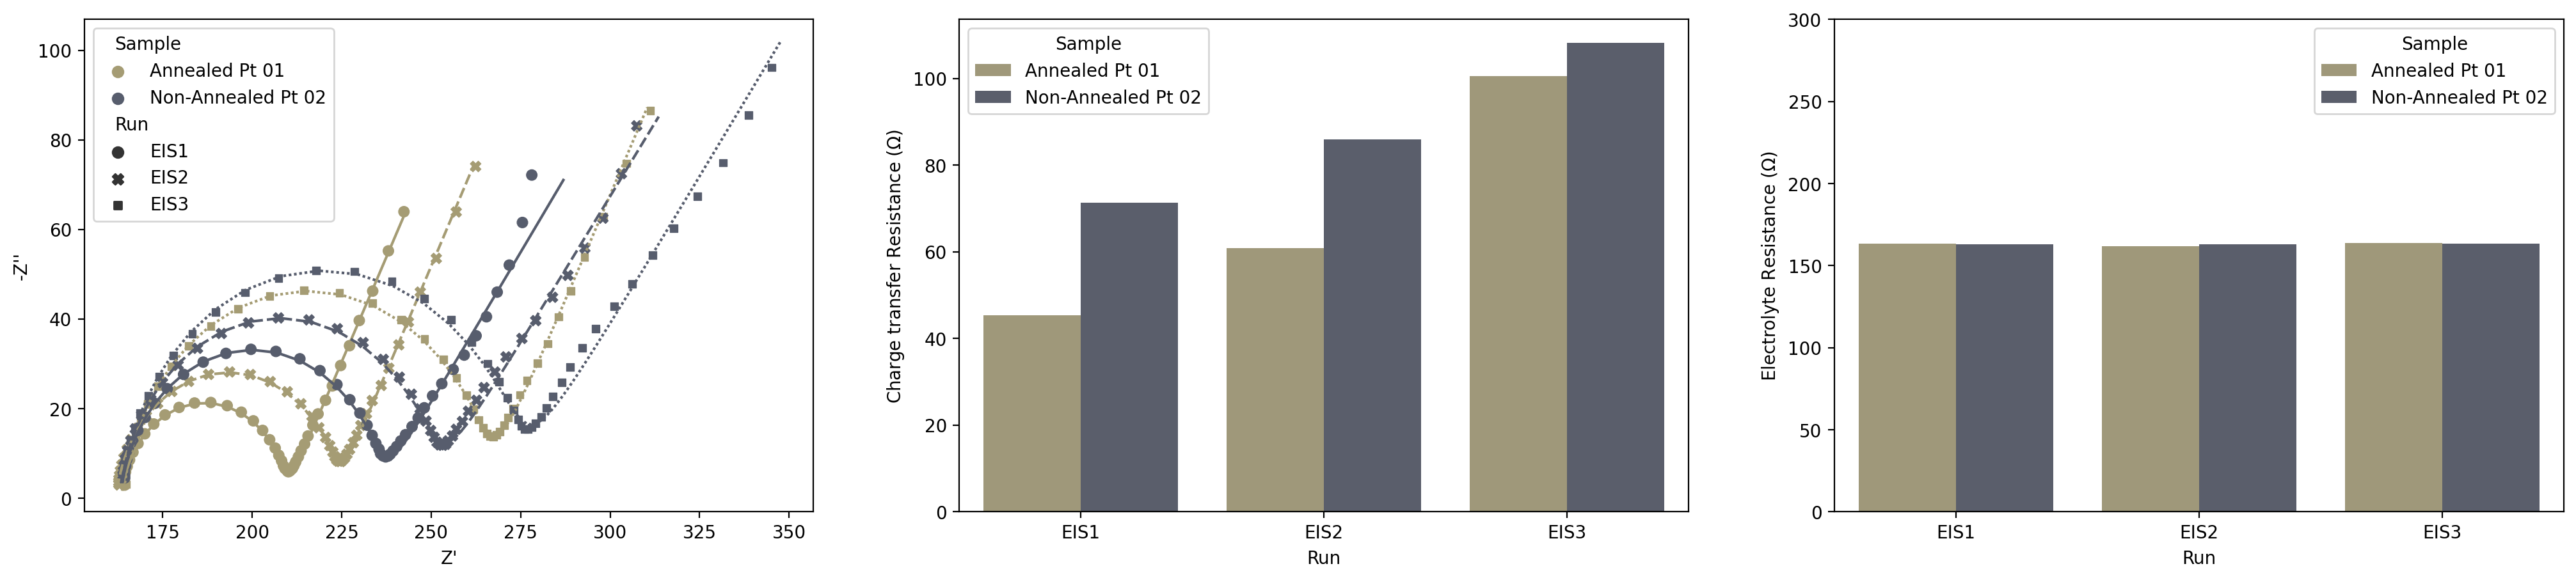

In [9]:
#Compare
fig, ax = plt.subplots(1,3, dpi = 200, figsize = (25,5))
spectra = pd.concat([spectra1, spectra2, spectra3, spectra_na1, spectra_na2, spectra_na3], ignore_index=True)
val = pd.concat([values1, values2, values3, values_na1, values_na2, values_na3], ignore_index=True)



sns.scatterplot(data = spectra[spectra[names[0]] == '4.0'], x = col[1], y = col[2], hue = 'Sample', style = 'Run', edgecolor = None, palette=palette, ax = ax[0])
sns.lineplot(data = spectra[spectra[names[0]] == '4.0'], x = col[4], y = col[5], hue = 'Sample', style = 'Run', legend = False, palette=palette, ax = ax[0])

sns.barplot(data = val[val[names[0]] == 4.0], x = 'Run', y = 'Charge transfer Resistance ($\Omega$)', hue = 'Sample', palette=palette, ax = ax[1])
sns.barplot(data = val[val[names[0]] == 4.0], x = 'Run', y = 'Electrolyte Resistance ($\Omega$)', hue = 'Sample', palette=palette, ax = ax[2])

ax[2].set_ylim(0,300)

In [7]:
r = 160
a = 0.63
l = 1 # Reasonable
def cond(r, area, l):
    return l / (r * area)

sigma = cond(r, a, l)
print(sigma)


print(np.pi * 0.45 ** 2)

0.00992063492063492
0.6361725123519332
